# Paths in AC/DC Subcircuits from Verd 2019

From the actual collected data, I took all the crossings of gene expression levels (where one epression level drops below another) for data from T8. Below is a table describing what is observed in the node sensitivity analysis in Figure 2.

#### AC/DC1:

| A-P | Hb | Gt | Kr | Kni |
| ---- | --- | --- | --- | --- |
| 35 - 39 | * | H | L | 0 |
| 39 - 43 | H | * | L | 0 |
| 43 - 45 | H | L | * | 0 |
| 44 - 48 | * | L | H | 0 |
    0...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
#### AC/DC2:

| A-P | Hb | Gt | Kr | Kni |
| ---- | --- | --- | --- | --- |
| 48 - 57 | * | 0 | H | L |
| 57 - 61 | L | 0 |H | * |

#### AC/DC3:

| A-P | Hb | Gt | Kr | Kni |
| ---- | --- | --- | --- | --- |
| 61 - 63 | 0 | L | H | * |
| 63 - 67 | 0 | L | * | H |
| 67 - 69 | 0 | * | L | H |
| 69 - 75 | 0 | H | L | * |

*: Gene must be 'on', but it is unknown how many thresholds the gene expression is above (if any),

H: Gene is above all of its thresholds

L: Gene is above one threshold but not above all,

0: Gene expression is off. 

In [1]:
import DSGRN
from DSGRN import *

import sys
sys.setrecursionlimit(10**8)
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')

from PGDraw import *
from MGsearchthroughPG import *
from NsearchgoeQuery import *
from stats import *

# AC/DC 1

In [2]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_1.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_1")
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

216


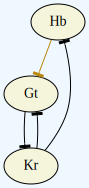

In [3]:
DrawGraph(network)

We need to decide what high, low and transitioning are for our fixed points. Starting out, I would like to have them described in the following way.

High for Hunchback (Hb) is 1, low is 0 and transitioning is [0,1].

High for Giant (Gt) is 1, low is 0 and transitioning is [0,1].

High for Kruppel (Kr) is 2, low is 0 and transitioning is [1,2].


| A-P | Hb | Gt | Kr |
| ---- | --- | --- | --- |
| 35 - 39 | [0,1] | 1 | 0 |
| 39 - 43 | 1 | [0,1] | 0 |
| 43 - 45 | 1 | 0 | [0,2] |
| 44 - 48 | [0,1] | 0 | 2 |

In [4]:
AP35 = {"Hb":[0,1], "Gt":1, "Kr":0}
AP39 = {"Hb":1, "Gt":[0,1], "Kr":0}
AP43 = {"Hb":1, "Gt":0, "Kr":[1,2]}
AP44 = {"Hb":[0,1], "Gt":0, "Kr":2}

In [5]:
%%capture
D = [[AP35], [AP39], [AP43], [AP44]]
M = MGsearchthroughPG(database,'=', '=', D).allpaths()

In [6]:
M

[[31, 32, 26, 62],
 [35, 32, 26, 62],
 [29, 32, 26, 62],
 [14, 32, 26, 62],
 [14, 8, 26, 62],
 [122, 116, 134, 170],
 [28, 29, 23, 59],
 [11, 29, 23, 59],
 [32, 29, 23, 59],
 [11, 5, 23, 59],
 [119, 113, 131, 167],
 [118, 112, 130, 166],
 [111, 112, 130, 166]]

In [7]:
n = 11
c = database.conn.cursor()
PGlist = M[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',M[n])
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [118, 112, 130, 166]
Associated MGI: [(112, 1), (118, 3), (130, 5), (166, 9)]


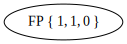

In [8]:
database.DrawMorseGraph(3) 

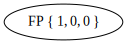

In [9]:
database.DrawMorseGraph(1)

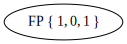

In [10]:
database.DrawMorseGraph(5)

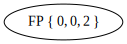

In [11]:
database.DrawMorseGraph(9)

In [12]:
stats(database, [1,2,3,4], 'Y').total()

[14, 7, 0, 0]

In [13]:
stats(database, [1,2,3,4], 'Y').percentage()

[66.67, 33.33, 0.0, 0.0]

# AC/DC 2

In [14]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_2.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_2")
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

216


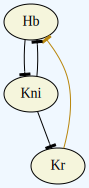

In [15]:
DrawGraph(network)

We need to decide what high, low and transitioning are for our fixed points. Starting out, I would like to have them described in the following way.

High for Hunchback (Hb) is 1, low is 0 and transitioning is [0,1].

High for Knirps (Kni) is 2, low is 0 and transitioning is [1,2].

High for Kruppel (Kr) is 1, low is 0 and transitioning is [0,1].


| A-P     | Hb  |  Kr  | Kni |
| ----    | --- |  --- | --- |
| 48 - 57 | [0,1]|  1   | 0   |
| 57 - 61 | 0   |  1    | [0,2]|

In [16]:
AP48 = {"Hb":[0,1], "Kr":1, "Kni":0}
AP57 = {"Hb":0, "Kr":1, "Kni":[1,2]}

In [17]:
%%capture
D = [[AP48], [AP57]]
N = MGsearchthroughPG(database,'=', '=', D).allpaths()

In [18]:
N

[[7, 25],
 [121, 139],
 [120, 138],
 [8, 26],
 [122, 140],
 [142, 140],
 [13, 31],
 [12, 30],
 [6, 24],
 [14, 32],
 [141, 139]]

In [19]:
n = 2
c = database.conn.cursor()
PGlist = N[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',N[n])
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [120, 138]
Associated MGI: [(120, 2), (138, 6)]


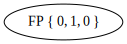

In [20]:
database.DrawMorseGraph(2)

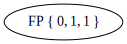

In [21]:
database.DrawMorseGraph(6)

In [22]:
stats(database, [1,2,3,4], 'Y').total()

[14, 7, 0, 0]

In [23]:
stats(database, [1,2,3,4], 'Y').percentage()

[66.67, 33.33, 0.0, 0.0]

# AC/DC 3

In [24]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_3.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_3")
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

216


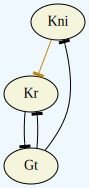

In [25]:
DrawGraph(network)

We need to decide what high, low and transitioning are for our fixed points. Starting out, I would like to have them described in the following way.

High for Giant (Hb) is 2, low is 0 and transitioning is [1,2].

High for Knirps (Kni) is 1, low is 0 and transitioning is [0,1].

High for Kruppel (Kr) is 1, low is 0 and transitioning is [0,1].

| A-P | Gt | Kr | Kni |
| ---- | --- | --- | --- |
| 61 - 63 | 0 | 1 | [0,1] |
| 63 - 67 | 0 | [0,1] | 1 |
| 67 - 69 | [1,2] | 0 | 1 |
| 69 - 75 | 2 | 0 | [0,1] |

In [26]:
AP61 = {"Kni":1, "Gt":0, "Kr":1}
AP63 = {"Kni":[0,1], "Gt":0, "Kr":[0,1]}
AP67 = {"Kni":1, "Gt":[0,2], "Kr":1}
AP69 = {"Kni":1, "Gt":2, "Kr":[0,1]}

In [27]:
%%capture
D = [[AP61], [AP63], [AP67], [AP69]]
O = MGsearchthroughPG(database,'=', '=', D).allpaths()

In [28]:
O

[[178, 179, 197, 194],
 [143, 179, 197, 194],
 [71, 179, 197, 194],
 [179, 71, 89, 107],
 [70, 71, 89, 107],
 [35, 71, 89, 107],
 [178, 179, 197, 215],
 [143, 179, 197, 215],
 [71, 179, 197, 215]]

In [29]:
n = 0
c = database.conn.cursor()
PGlist = O[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',O[n])
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [178, 179, 197, 194]
Associated MGI: [(178, 3), (179, 3), (194, 10), (197, 8)]


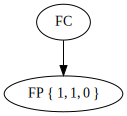

In [30]:
database.DrawMorseGraph(21)

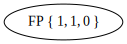

In [31]:
database.DrawMorseGraph(3)

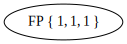

In [32]:
database.DrawMorseGraph(8)

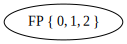

In [33]:
database.DrawMorseGraph(17)

In [34]:
stats(database, [1,2,3,4], 'Y').total()

[14, 7, 0, 0]

In [35]:
stats(database, [1,2,3,4], 'Y').percentage()

[66.67, 33.33, 0.0, 0.0]

# AC/DC3 with Selfloop on Kr

In [36]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_3Kr.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_3Kr")
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

10800


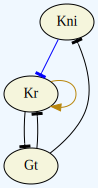

In [37]:
DrawGraph(network)

In [38]:
AP61 = {"Kni":[0,1], "Gt":0, "Kr":[1,2]}
AP63 = {"Kni":1, "Gt":[0,1], "Kr":[1,2]}
AP67 = {"Kni":1, "Gt":[1,2], "Kr":[0,1]}
AP69 = {"Kni":[0,1], "Gt":2, "Kr":[0,1]}

In [39]:
D = [[AP61], [AP63], [AP67], [AP69]]
P = MGsearchthroughPG(database,'=', '=', D).allpaths()

2020-08-20 12:12:00.887089:
MatchQuery({'Kni': [0, 1], 'Gt': 0, 'Kr': [1, 2]}, Matches0)
2020-08-20 12:12:00.887766:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _%' or Label like 'FP { 1, _, _%'", "Label like 'FP { _, 1, _%' or Label like 'FP { _, 2, _%'", "Label like 'FP { _, _, 0%'"]
2020-08-20 12:12:00.888376:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _, _%' or Label like 'FP { 1, _, _%';
2020-08-20 12:12:00.888919:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 1, _%' or Label like 'FP { _, 2, _%';
2020-08-20 12:12:00.889411:
MatchQuery :: create temp table Matches0 as select * from tmpMatches2 where Label like 'FP { _, _, 0%';
2020-08-20 12:12:00.889808:
MatchQuery :: constructed
2020-08-20 12:12:00.891755:
MatchQuery({'Kni': 1, 'Gt': [0, 1], 'Kr': [1, 2]}, Matches0)
2020-08-20 12:12:00.892105:
MatchQuery :: built expressions ["Label like 'FP { 1, _, 

2020-08-20 12:12:13.916783:
MatchQuery :: constructed
2020-08-20 12:12:14.327025:
MatchQuery({'Kni': 1, 'Gt': [1, 2], 'Kr': [0, 1]}, Matches0)
2020-08-20 12:12:14.327373:
MatchQuery :: built expressions ["Label like 'FP { 1, _, _%'", "Label like 'FP { _, 0, _%' or Label like 'FP { _, 1, _%'", "Label like 'FP { _, _, 1%' or Label like 'FP { _, _, 2%'"]
2020-08-20 12:12:14.327707:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 1, _, _%';
2020-08-20 12:12:14.328278:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _%' or Label like 'FP { _, 1, _%';
2020-08-20 12:12:14.328703:
MatchQuery :: create temp table Matches0 as select * from tmpMatches2 where Label like 'FP { _, _, 1%' or Label like 'FP { _, _, 2%';
2020-08-20 12:12:14.329095:
MatchQuery :: constructed
2020-08-20 12:12:14.330854:
MatchQuery({'Kni': 1, 'Gt': [1, 2], 'Kr': [0, 1]}, Matches0)
2020-08-20 12:12:14.331165:
Mat

In [40]:
P

[[4217, 4667, 5117, 5240],
 [9668, 10118, 4718, 2018],
 [9668, 4268, 4718, 2018],
 [4256, 4268, 4718, 2018],
 [4217, 4268, 4718, 2018],
 [4267, 4268, 4718, 2018],
 [4274, 4268, 4718, 2018],
 [3368, 4268, 4718, 2018],
 [4274, 4724, 4718, 2018],
 [4256, 4706, 4718, 2018],
 [4217, 4667, 4718, 2018],
 [3368, 3818, 4718, 2018],
 [9656, 10106, 10250, 10700],
 [9857, 10307, 10250, 10700],
 [5735, 5594, 6044, 6944],
 [5593, 5594, 6044, 6944],
 [5597, 5594, 6044, 6944],
 [194, 5594, 6044, 6944],
 [5546, 5594, 6044, 6944],
 [8294, 5594, 6044, 6944],
 [785, 644, 6044, 6944],
 [194, 644, 6044, 6944],
 [3344, 644, 6044, 6944],
 [4211, 4661, 1961, 2411],
 [4268, 4718, 2018, 2006],
 [860, 1310, 6710, 7610],
 [4268, 4718, 5168, 5318],
 [9656, 10106, 10556, 10511],
 [788, 647, 1547, 1544],
 [3347, 647, 1547, 1544],
 [197, 647, 1547, 1544],
 [9856, 10306, 10249, 10699],
 [9655, 10105, 10249, 10699],
 [4475, 4925, 10325, 7625],
 [8975, 9425, 10325, 7625],
 [9874, 9875, 10325, 7625],
 [9890, 9875, 10325, 

In [41]:
len(P)

2406

In [42]:
c = database.conn.cursor()
MGlist = [86]
string = 'create temp table C as select * from Signatures where MorseGraphIndex in ({seq})'.format(
seq=','.join(['?']*len(MGlist)))
c.execute(string, MGlist)
PGindex = [ row[0] for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',MGlist)
print('Associated MGI:', PGindex) #doesn't come back in order

Path: [86]
Associated MGI: [9499, 9505, 9601, 9607, 9613, 9649, 9652, 9658, 9661, 9664, 9670]


In [43]:
for i in PGindex:
    for j in P:
        if j[0]==i:
            print(j)

[9505, 9508, 9958, 7258]
[9505, 9508, 9958, 10408]
[9607, 9610, 10060, 10510]
[9607, 9610, 10060, 7360]
[9652, 9655, 10105, 7405]
[9652, 9655, 10105, 10555]


In [44]:
c = database.conn.cursor()
PGlist = [9652, 9655, 10105, 10555]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',PGlist)
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [9652, 9655, 10105, 10555]
Associated MGI: [(9652, 86), (9655, 5), (10105, 15), (10555, 29)]


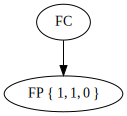

In [45]:
database.DrawMorseGraph(86)

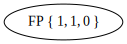

In [46]:
database.DrawMorseGraph(5)

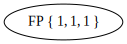

In [47]:
database.DrawMorseGraph(15)

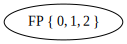

In [48]:
database.DrawMorseGraph(29)

If we are interested in how many of the Morse graphs have a particular number of fixed points, we can use the `stats.py` module. The inputs for the function are `stats(database, MGtype, FPonly_YorN)`, where the database is the database for the network of interest, MGtype is a list of integers represting the number of items in each Morse graph (items can be FP's, FC, XC, etr...), and FPonly_YorN is a string input that determines if you want to only items to mean FP's ('Y') or if items can be anything as stated above ('N'). 

In [49]:
stats(database, [1,2,3,4], 'Y').total()

[28, 48, 14, 0]

In [50]:
stats(database, [1,2,3,4], 'Y').percentage()

[31.11, 53.33, 15.56, 0.0]

In [51]:
stats(database, [1,2,3,4], 'N').total()

[19, 51, 21, 0]

In [52]:
stats(database, [1,2,3,4], 'N').percentage()

[20.88, 56.04, 23.08, 0.0]